In [1]:
# import libraries
import pickle
import cdt
import networkx as nx
import matplotlib.pyplot as plt# load data
print(cdt.__version__)
print(nx.__version__)

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


0.5.23
2.6.3


In [2]:
df = pickle.load( open( "df_causal_discovery.p", "rb") )
df

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0
...,...,...,...,...,...,...,...
32556,27,38,0,0,1,1,0
32557,40,40,0,1,1,0,1
32558,58,40,0,0,1,1,0
32559,22,20,0,0,1,0,0


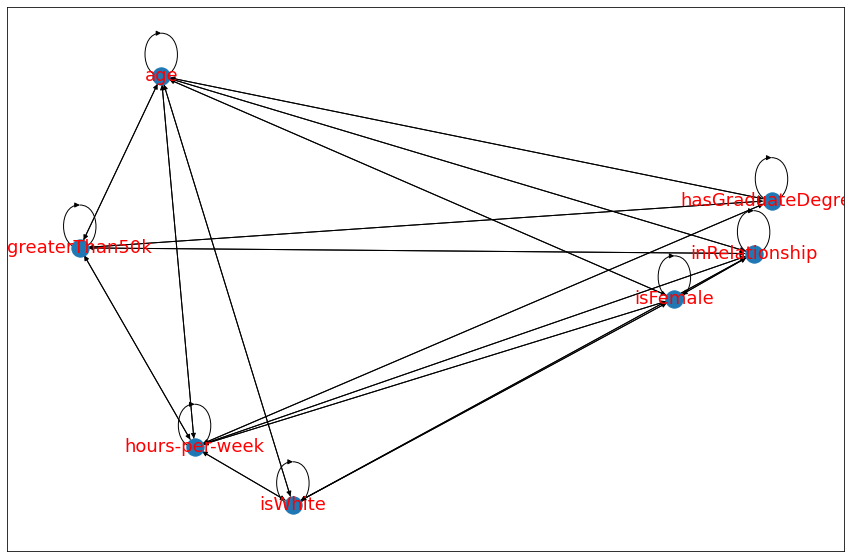

In [3]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()# apply graph lasso to data
skeleton = glasso.predict(df)# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

PC is ran on the skeleton of the given graph.


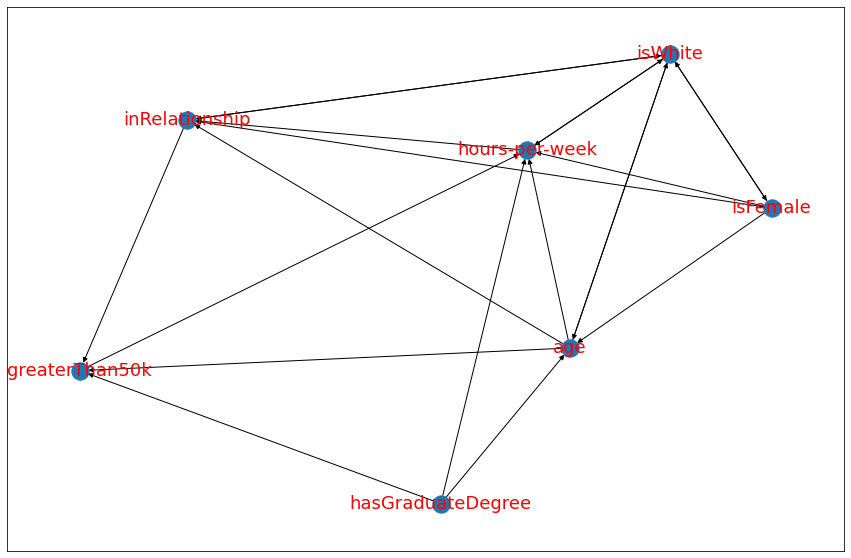

In [4]:
# Use causal discovery to get causal models# PC algorithm
cdt.SETTINGS.rpath = 'C:/Program Files/R/R-4.1.2/bin/Rscript'


model_pc = cdt.causality.graph.PC()
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')